In [1]:
import heapq
import numpy as np
import sys
sys.path.insert(0, '..')
from helpers.timing import timed, compare

# Жадные алгоритмы

__Жадный алгоритм__ — алгоритм, заключающийся в принятии локально оптимальных решений на каждом этапе, допуская, что конечное решение также окажется оптимальным.

__Надёжный шаг.__ Существует оптимальное решение, согласованное с локальным жадным шагом. 

__Оптимальность подзадач.__ Задача, остающаяся после жадного шага, имеет тот же тип.

# Очередь с приоритетами

Первая строка входа содержит число операций $1 \le n \le 10^5$. Каждая из последующих $n$ строк задают операцию одного из следующих двух типов:
```
    Insert x, где 0 ≤ x ≤ 10^9 — целое число;
    ExtractMax.
```
Первая операция добавляет число x x x в очередь с приоритетами, вторая — извлекает максимальное число и выводит его.


Sample Input:
```
6
Insert 200
Insert 10
ExtractMax
Insert 5
Insert 500
ExtractMax
```
Sample Output:
```
200
500
```



## Вариант для хитрожопых
Воспользуемся готовой реализацией модуля heapq. Будем брать отрицательные значения, так как heappop возвращает самый минимальный элемент, а по задаче надо самый большой элемент.

In [2]:
class SimpleHeap():
    h = []

    def insert(self, value):
        heapq.heappush(self.h, -value)

    def extractmax(self):
        return -heapq.heappop(self.h)

In [3]:
#import sys
#reader = (tuple(map(str,line.split())) for line in sys.stdin)
#lenght = int(next(reader)[0])
#simple_heap = SimpleHeap()
#for i in range(lenght):
#    func_and_var = next(reader)
#    if func_and_var[0] == 'Insert':
#        simple_heap.insert(int(func_and_var[1]))
#    elif func_and_var[0] == 'ExtractMax':
#        print(simple_heap.extractmax())

## Самописный вариант
Воспользуемся свойством удобной индексации массива при случае двоичной кучи.
- вершина $i$ имеет родителя $⌊i/2⌋$ и детей $2i$ и $2i + 1$ (при вычислении данных индексов нужно проверять, что они попадают в отрезок $[1, n]$)

In [4]:
class HandmadeHeap:
    h = []

    def __get_parent_idx(self, child_idx):
        return child_idx // 2

    def __get_child_idxs(self, parent_idx):
        last_idx = self.__get_last_idx()
        child_idxs = []
        if parent_idx == 0:
            child_idxs.append(1) if last_idx >= 1 else 0
            child_idxs.append(2) if last_idx >= 2 else 0
        else:
            child_idxs.append(2 * parent_idx) if 2 * parent_idx <= last_idx else 0
            child_idxs.append(2 * parent_idx + 1) if 2 * parent_idx + 1 <= last_idx else 0
        return child_idxs

    def __get_last_idx(self):
        return len(self.h) - 1

    # чтобы не юзать numpy
    def __argmin(self, ar):
        return min(range(len(ar)), key=lambda x: ar[x])

    def __up(self, child_idx):
        parent_idx = self.__get_parent_idx(child_idx)
        while (parent_idx != 0) or (child_idx != parent_idx):
            if (self.h[parent_idx] >= self.h[child_idx]):
                self.h[parent_idx], self.h[child_idx] = self.h[child_idx], self.h[parent_idx]
                parent_idx, child_idx = self.__get_parent_idx(child_idx), parent_idx
            else:
                break

    def __down(self, parent_idx):
        child_idxs = self.__get_child_idxs(parent_idx)
        while len(child_idxs) != 0:
            child_values = list(self.h[i] for i in child_idxs)
            if min(child_values) <= self.h[parent_idx]:
                min_child_idx = child_idxs[self.__argmin(child_values)]
                self.h[min_child_idx], self.h[parent_idx] = self.h[parent_idx], self.h[min_child_idx]
                parent_idx = min_child_idx
                child_idxs = self.__get_child_idxs(min_child_idx)
            else:
                break

    def insert(self, value):
        self.h.append(-value)
        self.__up(self.__get_last_idx())

    def extractmax(self):
        last_idx = self.__get_last_idx()
        self.h[0], self.h[last_idx] = self.h[last_idx], self.h[0]
        h_min = self.h.pop(last_idx)
        self.__down(0)
        return -h_min

## Тестирование

In [5]:
def sort(heap, arr):
    for val in arr:
        heap.insert(val)    
    sorted_arr = []
    for i in range(len(arr)):
        sorted_arr.append(heap.extractmax())
    return(sorted_arr)

In [6]:
def test(heap):
    try:
        for i in range(100): 
            arr = np.random.randint(1, 1000, 20)
            assert np.array_equal(sort(heap, arr), np.sort(arr)[::-1])
    except:
        print('Отработал с ошибками')
    else:
        print('Отработал без ошибок')

In [7]:
test(SimpleHeap())

Отработал без ошибок


In [8]:
test(HandmadeHeap())

Отработал без ошибок


Оба варианта отсортировали массив на основе кучи.

## Сравнение

In [9]:
def simple_sort(arr):
    sort(SimpleHeap(), arr)

In [10]:
def handmade_sort(arr):
    sort(HandmadeHeap(), arr)

In [11]:
def compare_wrapper(low, high, max_size):
    array_for_sort = np.random.randint(low, high, max_size)
    arrays_list_for_sort = []
    for size in range(1, max_size):
            arrays_list_for_sort.append(array_for_sort[:size])
    compare((simple_sort, handmade_sort), arrays_list_for_sort, unpack_array=False)

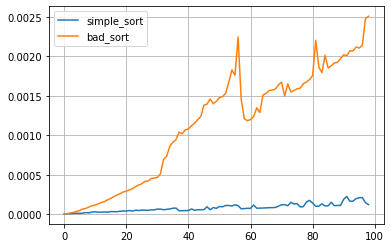

In [12]:
compare_wrapper(low=1, high=1000, max_size=100)

`heapq` работает намного быстрее, чем самописный код